In [1]:
import os
import errno
import rasterio

# Lista de nombres de puertos
# nombres_de_puertos = ["TPCallao"]
# nombres_de_puertos = ["TPPaita"]
nombres_de_puertos = ["TPMatarani"]

# Directorio base de entrada para las imágenes TIFF
base_folder_tif = "/home/farix/python/dataset"

# Directorio base de salida para las imágenes PNG
base_folder_png = base_folder_tif  # Usamos el mismo directorio base

# Recorre los nombres de los puertos
for puerto in nombres_de_puertos:
    input_folder_tif = os.path.join(base_folder_tif, puerto, "BLOQUES512")
    output_base_folder_png = os.path.join(base_folder_png, puerto, "BLOQUES512PNG")

    # Verifica si el directorio de salida para PNG base existe, y si no, créalo
    if not os.path.exists(output_base_folder_png):
        os.makedirs(output_base_folder_png)

    # Recorre las carpetas en el directorio de entrada
    for carpeta in os.listdir(input_folder_tif):
        carpeta_tif = os.path.join(input_folder_tif, carpeta)
        
        

        # Verifica si la carpeta de imágenes PNG de salida existe, y si no, créala
        carpeta_png = os.path.join(output_base_folder_png, carpeta)
        if not os.path.exists(carpeta_png):
            os.makedirs(carpeta_png)
        else:
            # Si la carpeta ya existe, pasa al siguiente bucle
            continue
        # Recorre las imágenes TIFF en la carpeta de imágenes de entrada
        for imagen in os.listdir(carpeta_tif):
            imagen_tif_path = os.path.join(carpeta_tif, imagen)
            
            # Verifica si la extensión no es ".tif.aux.xml" antes de procesar
            if not imagen.endswith(".tif.aux.xml"):
                # Convierte la imagen TIFF a PNG
                
                # Abre la imagen TIFF con Rasterio
                imagen_tif = rasterio.open(imagen_tif_path)

                # Obtiene el valor mínimo y máximo de las bandas
                bandas = [imagen_tif.read(i) for i in range(1, imagen_tif.count + 1)]
                bandas_min = [banda.min() for banda in bandas]
                bandas_max = [banda.max() for banda in bandas]

                # Nombre del archivo de salida en formato PNG
                nombre_base = os.path.splitext(imagen)[0]
                imagen_png_path = os.path.join(carpeta_png, f"{nombre_base}.png")

                # Comando para convertir de TIFF a PNG utilizando gdal_translate
                comando_convertir = [
                    "gdal_translate",
                    "-ot", "Byte",
                    "-of", "PNG",
                    f"-scale_1", f"{bandas_min[0]}", f"{bandas_max[0]}",
                    f"-scale_2", f"{bandas_min[1]}", f"{bandas_max[1]}",
                    f"-scale_3", f"{bandas_min[2]}", f"{bandas_max[2]}",
                    "-a_nodata", "none",
                    imagen_tif_path, imagen_png_path
                ]

                # Ejecuta el comando para convertir a PNG
                os.system(" ".join(comando_convertir))

# Elimina los archivos XML generados durante la conversión
delete_xml = f"find {base_folder_png} -name '*.aux.xml' -exec rm {{}} +"
os.system(delete_xml)


Input file size is 512, 512
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 512, 512
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 512, 107
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 512, 512
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 512, 512
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 512, 512
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 512, 512
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 452, 512
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 512, 512
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 512, 512
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 512, 512
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 51

0

In [3]:
import os

def sync_folders(png_folder, tif_folder):
    # Obtén la lista de carpetas en el directorio PNG
    png_subfolders = [f for f in os.listdir(png_folder) if os.path.isdir(os.path.join(png_folder, f))]

    for subfolder in png_subfolders:
        # Crea las rutas completas para las carpetas PNG y TIF correspondientes
        png_subfolder = os.path.join(png_folder, subfolder)
        tif_subfolder = os.path.join(tif_folder, subfolder)

        # Verifica si la carpeta TIF correspondiente existe
        if os.path.exists(tif_subfolder):
            # Obtén la lista de archivos PNG y TIF en las carpetas correspondientes
            png_files = [f for f in os.listdir(png_subfolder) if f.endswith(".png")]
            tif_files = [f for f in os.listdir(tif_subfolder) if f.endswith(".tif")]

            # Crea un conjunto de nombres base (sin extensiones) para los archivos PNG
            png_names = {os.path.splitext(file)[0] for file in png_files}

            # Crea un conjunto de nombres base (sin extensiones) para los archivos TIF
            tif_names = {os.path.splitext(file)[0] for file in tif_files}

            # Encuentra los nombres que existen en ambos conjuntos
            common_names = png_names.intersection(tif_names)

            # Elimina los archivos TIF que no tienen un equivalente en PNG
            for tif_file in tif_files:
                tif_name_base = os.path.splitext(tif_file)[0]
                if tif_name_base not in common_names:
                    tif_path = os.path.join(tif_subfolder, tif_file)
                    os.remove(tif_path)

            # Elimina los archivos PNG que no tienen un equivalente en TIF
            for png_file in png_files:
                png_name_base = os.path.splitext(png_file)[0]
                if png_name_base not in common_names:
                    png_path = os.path.join(png_subfolder, png_file)
                    os.remove(png_path)
        else:
            # Si la carpeta TIF correspondiente no existe, elimina la carpeta PNG
            os.rmdir(png_subfolder)

# Ejemplo de uso:
png_folder = "/home/farix/python/dataset/TPMatarani/BLOQUES512PNG/"
tif_folder = "/home/farix/python/dataset/TPMatarani/BLOQUES512/"
sync_folders(png_folder, tif_folder)


In [17]:
import os
# Sincronizar carpetas ya en formato recorrido
# Rutas de las carpetas
ruta_imagenes_tiff = '/home/farix/python/dataset/TPCallao/imagenesTIFF'
ruta_imagenes_png = '/home/farix/python/dataset/TPCallao/imagenespng'

# Obtener los nombres de los archivos en ambas carpetas
archivos_tiff = os.listdir(ruta_imagenes_tiff)
archivos_png = os.listdir(ruta_imagenes_png)

# Obtener los nombres base de los archivos sin la extensión
nombres_base_tiff = {os.path.splitext(archivo)[0] for archivo in archivos_tiff}
nombres_base_png = {os.path.splitext(archivo)[0] for archivo in archivos_png}

# Identificar archivos en imagenesTIFF que no tienen un equivalente en imagenespng
archivos_a_eliminar = [archivo for archivo in archivos_tiff if os.path.splitext(archivo)[0] not in nombres_base_png]

# Mostrar la cantidad de archivos a eliminar
print("Número de archivos a eliminar:", len(archivos_a_eliminar))
print( archivos_a_eliminar)

# Eliminar los archivos no coincidentes en imagenesTIFF
# for archivo in archivos_a_eliminar:
#     ruta_completa = os.path.join(ruta_imagenes_tiff, archivo)
#     os.remove(ruta_completa)

Número de archivos a eliminar: 0
[]


In [4]:
# Utilidad - Copiar todas las imagenes png a carpeta
import os
import shutil

# Ruta de origen
ruta_origen = '/home/farix/python/dataset/TPMatarani/BLOQUES512PNG'

# Ruta de destino para los archivos PNG
ruta_destino_imagenes = '/home/farix/python/dataset/TPMatarani/imagenespng'

# Crear la carpeta 'imagenespng' en caso de que no exista
if not os.path.exists(ruta_destino_imagenes):
    os.mkdir(ruta_destino_imagenes)

# Recorrer las carpetas en la ruta de origen
for dirpath, dirnames, filenames in os.walk(ruta_origen):
    for filename in filenames:
        if filename.lower().endswith('.png'):
            # Ruta completa del archivo PNG
            ruta_completa_imagen = os.path.join(dirpath, filename)
            
            # Copiar el archivo a la carpeta de destino
            shutil.copy(ruta_completa_imagen, ruta_destino_imagenes)


In [5]:
# Utilidad - Copiar todas las imagenes tiff a carpeta
import os
import shutil

# Ruta de origen
ruta_origen = '/home/farix/python/dataset/TPMatarani/BLOQUES512'

# Ruta de destino para los archivos PNG
ruta_destino_imagenes = '/home/farix/python/dataset/TPMatarani/imagenestiff'

# Crear la carpeta 'imagenespng' en caso de que no exista
if not os.path.exists(ruta_destino_imagenes):
    os.mkdir(ruta_destino_imagenes)

# Recorrer las carpetas en la ruta de origen
for dirpath, dirnames, filenames in os.walk(ruta_origen):
    for filename in filenames:
        if filename.lower().endswith('.tif'):
            # Ruta completa del archivo PNG
            ruta_completa_imagen = os.path.join(dirpath, filename)
            
            # Copiar el archivo a la carpeta de destino
            shutil.copy(ruta_completa_imagen, ruta_destino_imagenes)


In [24]:
print(carpeta_png)

/home/farix/python/dataset/TPPaita/BLOQUES512PNG/IMG_PER1_20210317_block_2_2


In [25]:
imagen_tif_path ='/home/farix/python/dataset/TPPaita/BLOQUES/IMG_PER1_20200812155657_ORT_P_002880_pansharpened/IMG_PER1_20200812_block_2_1.tif'
carpeta_png = '/home/farix/python/dataset/TPPaita/'
imagen_tif = rasterio.open(imagen_tif_path)

# Obtiene el valor mínimo y máximo de las bandas
bandas = [imagen_tif.read(i) for i in range(1, imagen_tif.count + 1)]
bandas_min = [banda.min() for banda in bandas]
bandas_max = [banda.max() for banda in bandas]

# Nombre del archivo de salida en formato PNG
nombre_base = os.path.splitext(imagen)[0]
imagen_png_path = os.path.join(carpeta_png, f"{nombre_base}.png")

# Comando para convertir de TIFF a PNG utilizando gdal_translate
comando_convertir = [
"gdal_translate",
"-ot", "Byte",
"-of", "PNG",
f"-scale_1", f"{bandas_min[0]}", f"{bandas_max[0]}",
f"-scale_2", f"{bandas_min[1]}", f"{bandas_max[1]}",
f"-scale_3", f"{bandas_min[2]}", f"{bandas_max[2]}",
"-a_nodata", "none",
imagen_tif_path, imagen_png_path
]

# Ejecuta el comando para convertir a PNG
os.system(" ".join(comando_convertir))

Input file size is 9003, 14903
0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [15]:
# Ordenar para entrenamiento
import os
import shutil
import random

# Directorio de origen que contiene imágenes y archivos de texto
source_dir = "/home/farix/python/dataset/imagenesTotalesPng"

# Directorio de destino para las imágenes y archivos de texto seleccionados
destination_dir_selected = "/home/farix/python/dataset/imagenesTotalesPngTrain"

# Directorio de destino para las imágenes no seleccionadas
destination_dir_remaining = "/home/farix/python/dataset/imagenesTotalesPngVal"

# Crear directorio de destino si no existe
os.makedirs(destination_dir_selected, exist_ok=True)
os.makedirs(destination_dir_remaining, exist_ok=True)

# Lista de archivos de imágenes en el directorio de origen
image_files = [file for file in os.listdir(source_dir) if file.endswith((".jpg", ".png", ".jpeg", ".bmp"))]

# Crear una lista de tuplas (nombre de imagen, nombre de archivo de texto)
image_text_pairs = [(image, image.replace(".png", ".txt")) for image in image_files]

# Seleccionar aleatoriamente 300 imágenes
selected_image_text_pairs = random.sample(image_text_pairs, min(312, len(image_files)))

# Copiar las imágenes seleccionadas y sus archivos de texto correspondientes (si existen)
for image, text_file in selected_image_text_pairs:
    source_image_path = os.path.join(source_dir, image)
    destination_image_path = os.path.join(destination_dir_selected, image)
    source_text_path = os.path.join(source_dir, text_file)
    
    if os.path.exists(source_text_path):
        destination_text_path = os.path.join(destination_dir_selected, text_file)
        shutil.copy(source_text_path, destination_text_path)
    
    shutil.copy(source_image_path, destination_image_path)

# Copiar las imágenes no seleccionadas a la carpeta de destino restante
for image, text_file in image_text_pairs:
    if (image, text_file) not in selected_image_text_pairs:
        source_image_path = os.path.join(source_dir, image)
        destination_image_path = os.path.join(destination_dir_remaining, image)
        source_text_path = os.path.join(source_dir, text_file)
        
        if os.path.exists(source_text_path):
            destination_text_path = os.path.join(destination_dir_remaining, text_file)
            shutil.copy(source_text_path, destination_text_path)
        
        shutil.copy(source_image_path, destination_image_path)

print("Proceso completado.")


Proceso completado.


In [6]:
# Creacion de dataset
import os
import shutil
import random

# Directorio de origen que contiene imágenes y archivos de texto
source_dir = "/home/farix/python/dataset/imagenesTotalesPng"

# Directorio de destino para las imágenes y archivos de texto seleccionados
destination_dir_selected = "/home/farix/python/dataset/imagenesTotalesPngTrain"

# Directorio de destino para las imágenes y archivos de texto no seleccionados
destination_dir_remaining = "ruta/a/tu/directorio/carpeta_restanteVal"

# Crear directorios de destino si no existen
os.makedirs(destination_dir_selected, exist_ok=True)
os.makedirs(destination_dir_remaining, exist_ok=True)

# Lista de archivos de imágenes en el directorio de origen
image_files = [file for file in os.listdir(source_dir) if file.endswith((".jpg", ".png", ".jpeg", ".bmp"))]

# Seleccionar aleatoriamente 300 imágenes
selected_images = random.sample(image_files, min(300, len(image_files)))

# Copiar las imágenes seleccionadas y sus archivos de texto correspondientes
for image in selected_images:
    source_image_path = os.path.join(source_dir, image)
    destination_image_path = os.path.join(destination_dir_selected, image)
    shutil.copy(source_image_path, destination_image_path)

    # Comprobar si hay un archivo de texto correspondiente
    text_file = os.path.splitext(image)[0] + ".txt"
    if text_file in image_files:
        source_text_path = os.path.join(source_dir, text_file)
        destination_text_path = os.path.join(destination_dir_selected, text_file)
        shutil.copy(source_text_path, destination_text_path)

# Copiar las imágenes y archivos de texto no seleccionados a la carpeta de destino restante
for image in image_files:
    if image not in selected_images:
        source_image_path = os.path.join(source_dir, image)
        destination_image_path = os.path.join(destination_dir_remaining, image)
        shutil.copy(source_image_path, destination_image_path)

        # Comprobar si hay un archivo de texto correspondiente
        text_file = os.path.splitext(image)[0] + ".txt"
        if text_file in image_files:
            source_text_path = os.path.join(source_dir, text_file)
            destination_text_path = os.path.join(destination_dir_remaining, text_file)
            shutil.copy(source_text_path, destination_text_path)

print("Proceso completado.")


Proceso completado.


In [22]:
!pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.9 MB/s eta 0:00:00


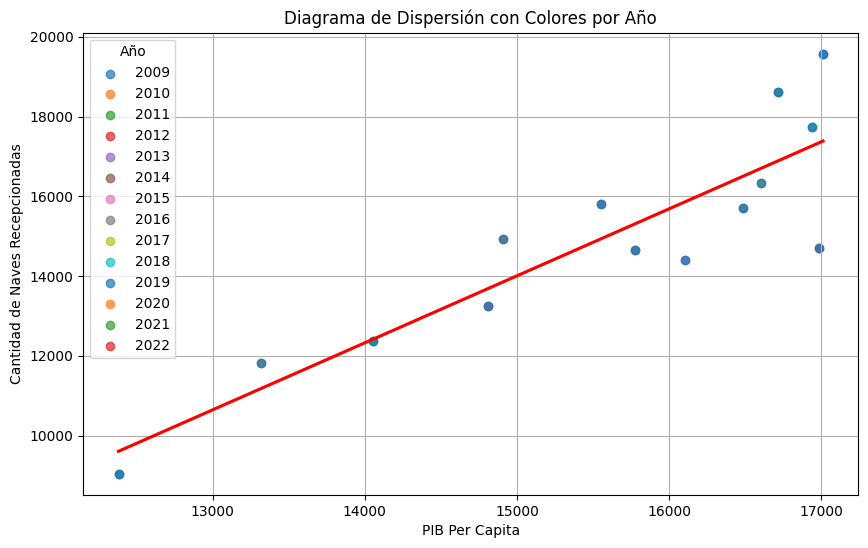

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con tus datos (solo 'PIB Per Capita' y 'Cantidad de Naves Recepcionadas')
data = {
    'Año': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'PIB Per Capita': [12382, 13316, 14055, 14811, 15556, 15779, 16103, 16487, 16602, 16940, 17012, 14908, 16719, 16986],
    'Cantidad de Naves Recepcionadas': [9044, 11820, 12375, 13260, 15807, 14643, 14402, 15709, 16338, 17730, 19577, 14936, 18607, 14701]
}

df = pd.DataFrame(data)

# Crear un diagrama de dispersión (scatter plot) con colores por año
plt.figure(figsize=(10, 6))
palette = sns.color_palette("viridis", as_cmap=True)

for year in df['Año'].unique():
    subset = df[df['Año'] == year]
    plt.scatter(subset['PIB Per Capita'], subset['Cantidad de Naves Recepcionadas'], label=year, alpha=0.7)

plt.title('Diagrama de Dispersión con Colores por Año')
sns.regplot(x='PIB Per Capita', y='Cantidad de Naves Recepcionadas', data=df, ci=None, line_kws={"color": "red"})
plt.xlabel('PIB Per Capita S/.')
plt.ylabel('Cantidad de Naves Recepcionadas')
plt.legend(title='Año')
plt.grid(True)
plt.show()


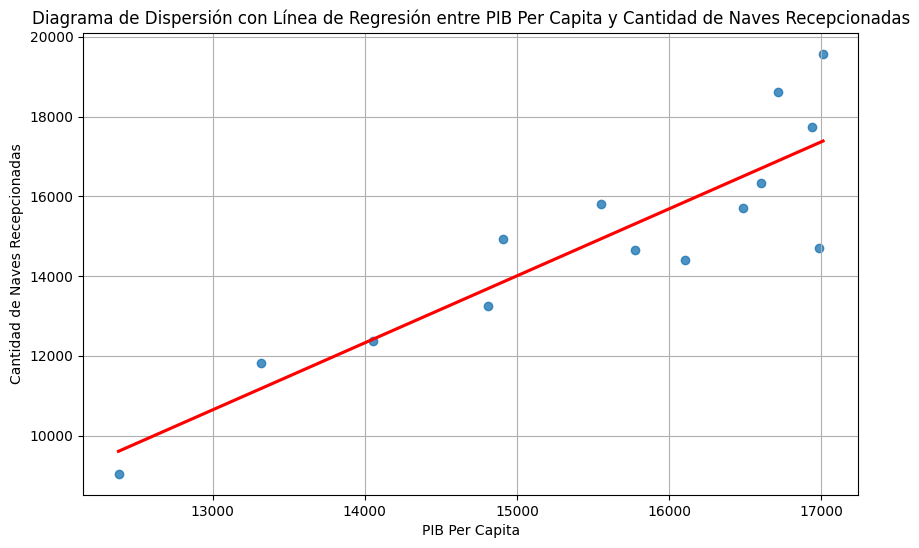

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con tus datos (solo 'PIB Per Capita' y 'Cantidad de Naves Recepcionadas')
data = {
    'Año': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'PIB Per Capita': [12382, 13316, 14055, 14811, 15556, 15779, 16103, 16487, 16602, 16940, 17012, 14908, 16719, 16986],
    'Cantidad de Naves Recepcionadas': [9044, 11820, 12375, 13260, 15807, 14643, 14402, 15709, 16338, 17730, 19577, 14936, 18607, 14701]
}

df = pd.DataFrame(data)

# Crear un diagrama de dispersión (scatter plot) con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='PIB Per Capita', y='Cantidad de Naves Recepcionadas', data=df, ci=None, line_kws={"color": "red"})
plt.title('Diagrama de Dispersión con Línea de Regresión entre PIB Per Capita y Cantidad de Naves Recepcionadas')
plt.xlabel('PIB Per Capita')
plt.ylabel('Cantidad de Naves Recepcionadas')
plt.grid(True)
plt.show()


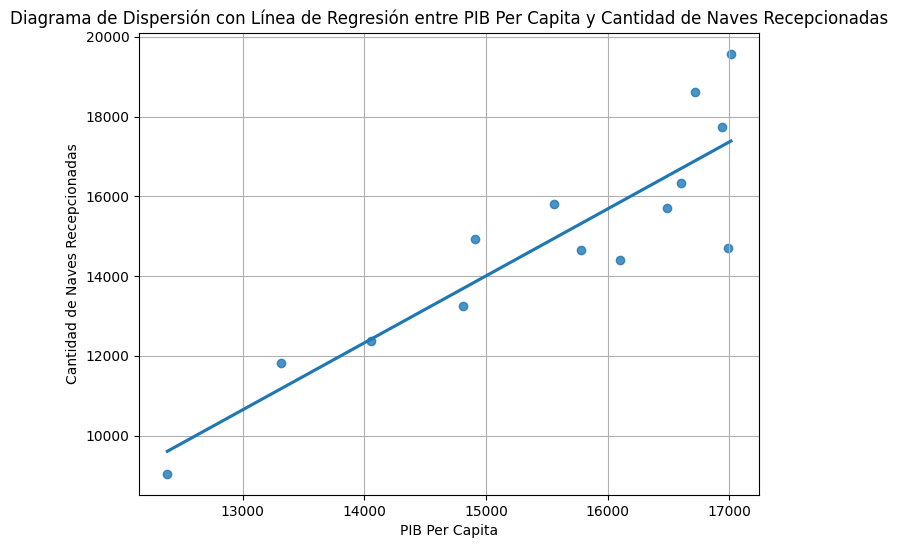

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con tus datos (solo 'PIB Per Capita' y 'Cantidad de Naves Recepcionadas')
data = {
    'PIB Per Capita': [12382, 13316, 14055, 14811, 15556, 15779, 16103, 16487, 16602, 16940, 17012, 14908, 16719, 16986],
    'Cantidad de Naves Recepcionadas': [9044, 11820, 12375, 13260, 15807, 14643, 14402, 15709, 16338, 17730, 19577, 14936, 18607, 14701]
}

df = pd.DataFrame(data)



# También puedes agregar una línea de regresión lineal
plt.figure(figsize=(8, 6))
sns.regplot(x='PIB Per Capita', y='Cantidad de Naves Recepcionadas', data=df, ci=None)
plt.title('Diagrama de Dispersión con Línea de Regresión entre PIB Per Capita y Cantidad de Naves Recepcionadas')
plt.xlabel('PIB Per Capita')
plt.ylabel('Cantidad de Naves Recepcionadas')
plt.grid(True)
plt.show()


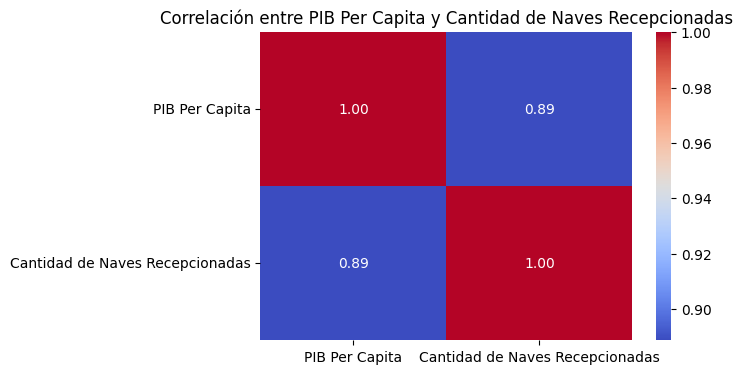

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con tus datos (solo 'PIB Per Capita' y 'Cantidad de Naves Recepcionadas')
data = {
    'PIB Per Capita': [12382, 13316, 14055, 14811, 15556, 15779, 16103, 16487, 16602, 16940, 17012, 14908, 16719, 16986],
    'Cantidad de Naves Recepcionadas': [9044, 11820, 12375, 13260, 15807, 14643, 14402, 15709, 16338, 17730, 19577, 14936, 18607, 14701]
}

df = pd.DataFrame(data)

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un gráfico de correlación usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre PIB Per Capita y Cantidad de Naves Recepcionadas')
plt.show()


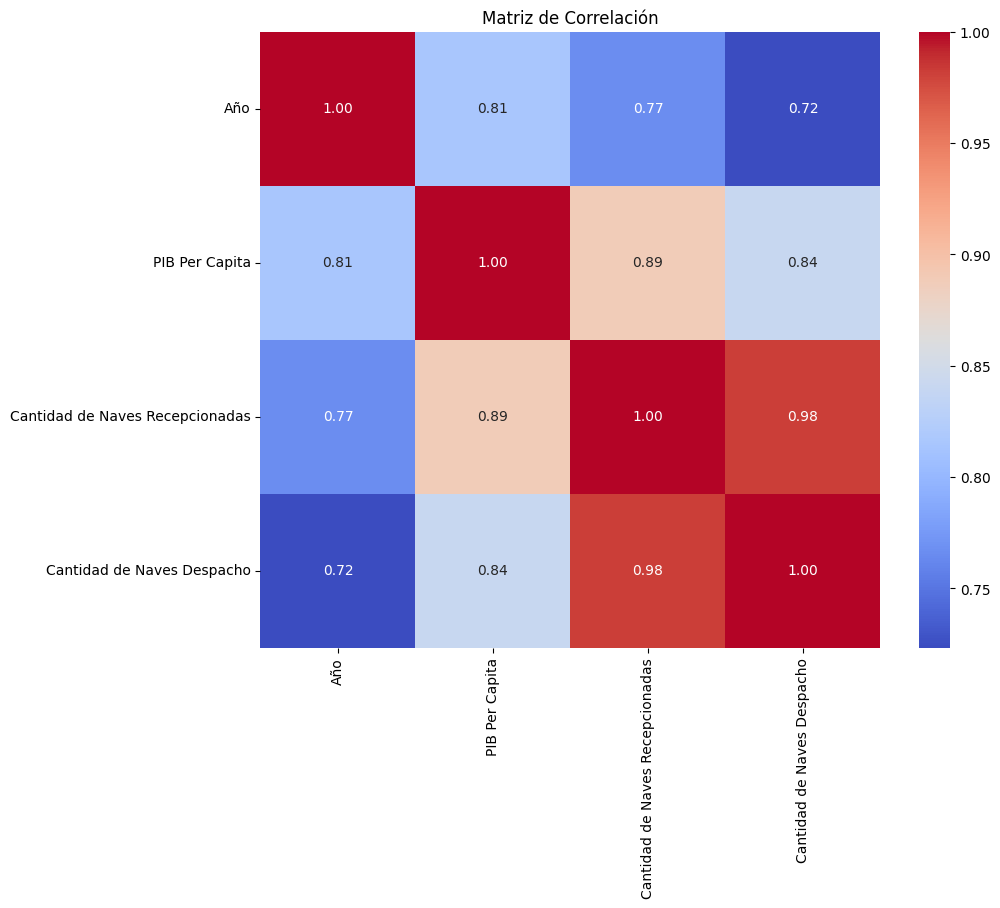

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con tus datos
data = {
    'Año': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'PIB Per Capita': [12382, 13316, 14055, 14811, 15556, 15779, 16103, 16487, 16602, 16940, 17012, 14908, 16719, 16986],
    'Cantidad de Naves Recepcionadas': [9044, 11820, 12375, 13260, 15807, 14643, 14402, 15709, 16338, 17730, 19577, 14936, 18607, 14701],
    'Cantidad de Naves Despacho': [9137, 11939, 12446, 13310, 18107, 14643, 14402, 15709, 16435, 18070, 20349, 15488, 19338, 14987]
}

df = pd.DataFrame(data)

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un gráfico de correlación usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [18]:
import pandas as pd

# Crear un DataFrame a partir de tus datos
data = {
    "Año": [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "PIB Per Capita": [12382, 13316, 14055, 14811, 15556, 15779, 16103, 16487, 16602, 16940, 17012, 14908, 16719, 16986],
    "Cantidad de Naves Recepcionadas": [9044, 11820, 12375, 13260, 15807, 14643, 14402, 15709, 16338, 17730, 19577, 14936, 18607, 14701],
    "Cantidad de Naves Despacho": [9137, 11939, 12446, 13310, 18107, 14643, 14402, 15709, 16435, 18070, 20349, 15488, 19338, 14987]
}

df = pd.DataFrame(data)

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                                      Año  PIB Per Capita  \
Año                              1.000000        0.814409   
PIB Per Capita                   0.814409        1.000000   
Cantidad de Naves Recepcionadas  0.765946        0.888638   
Cantidad de Naves Despacho       0.723368        0.840684   

                                 Cantidad de Naves Recepcionadas  \
Año                                                     0.765946   
PIB Per Capita                                          0.888638   
Cantidad de Naves Recepcionadas                         1.000000   
Cantidad de Naves Despacho                              0.982544   

                                 Cantidad de Naves Despacho  
Año                                                0.723368  
PIB Per Capita                                     0.840684  
Cantidad de Naves Recepcionadas                    0.982544  
Cantidad de Naves Despacho                         1.000000  
